In [1]:
import time
import pickle
import myPlot
import my_neuron as neuron
import matplotlib as plt
import importlib
from IPython.display import clear_output

In [ ]:
approx_total_time = 100 #min

importlib.reload(myPlot)
axes = None
temp = 0
n_plots = 4

for i in range(approx_total_time):
    time.sleep(60)
    f1 = open("parameters", "rb")
    parameters: neuron.SimulationParameters = pickle.load(f1)
    if (temp == parameters.N_iterations):
        continue
    temp = parameters.N_iterations
    f2 = open("properties", "rb")
    properties: neuron.Properties = pickle.load(f2)
    f3 = open("values", "rb")
    values = pickle.load(f3)
    print("Numero di iterazioni: %d"%parameters.N_iterations)
    axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, n_drawings=len(values.track_variables) ,n_plots=n_plots)
    print(str(properties) + "\n" + str(parameters))
    clear_output(wait=True)

Numero di iterazioni: 10


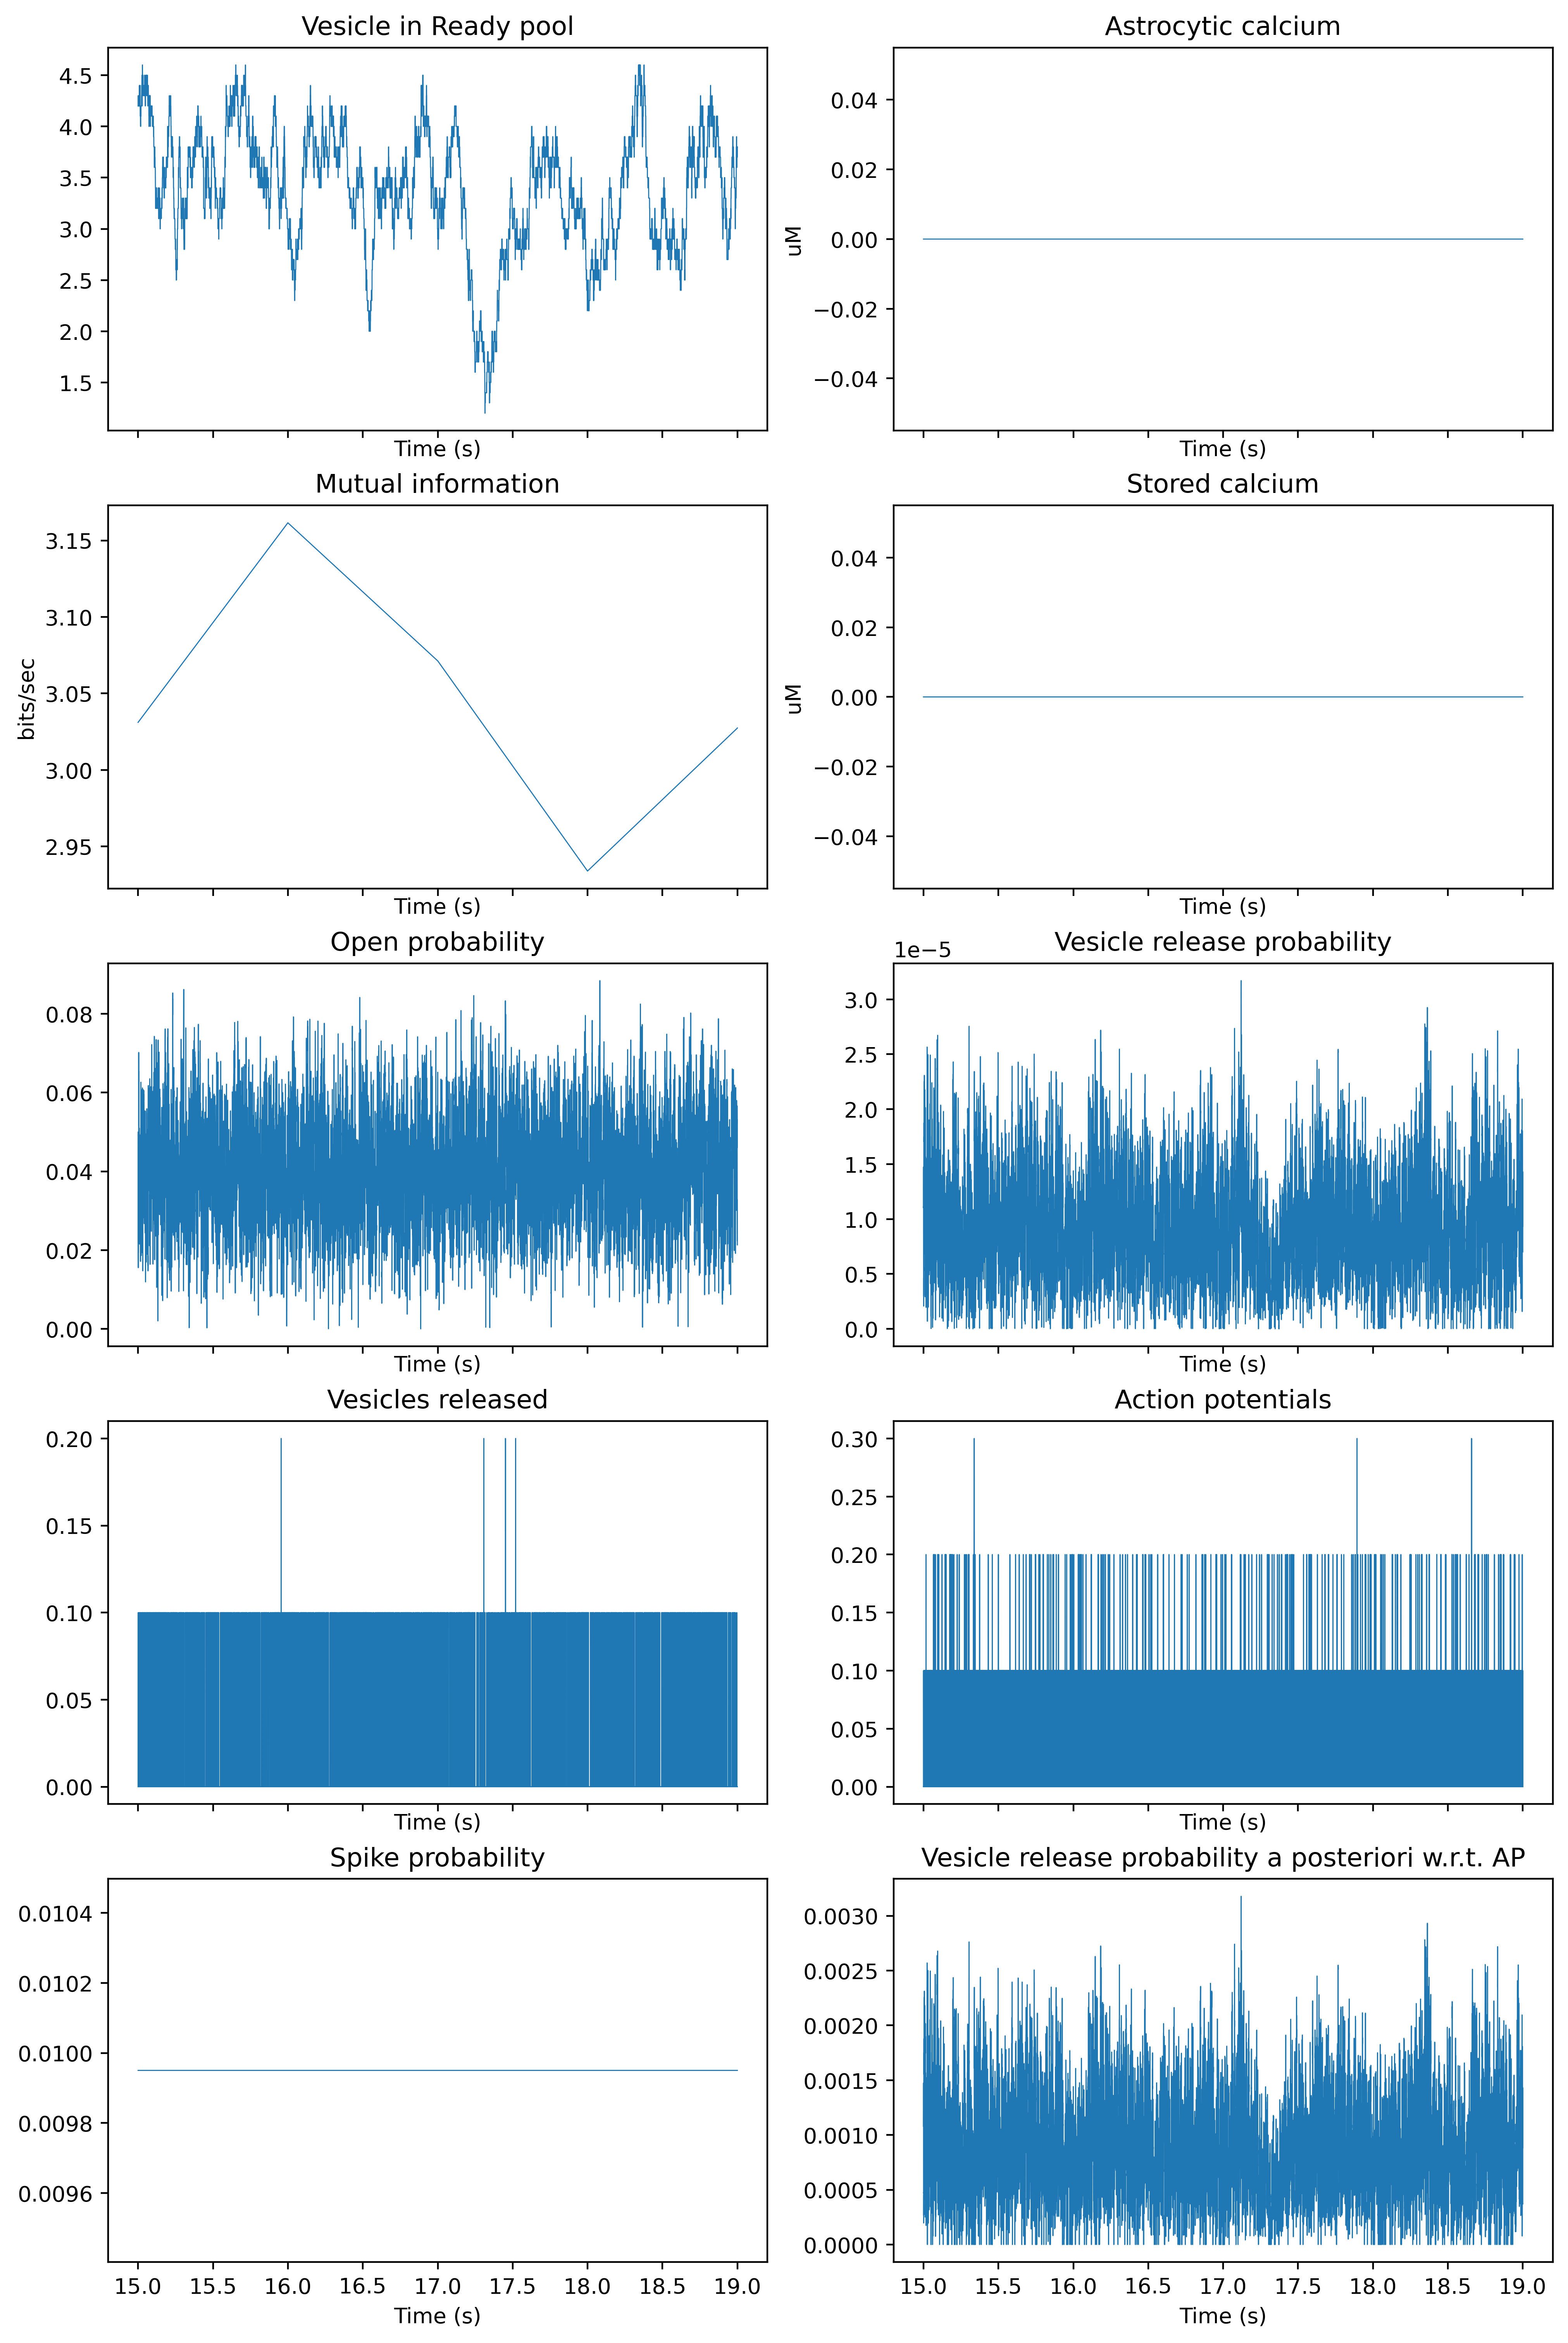

Average number of APs: 993.0 (33.1 Hz)
Average number of vesicle releases: 173.8 (5.8 Hz)
Average mutual information: 0.4065 bit/s
membrane_tau = 0.02 s
spike_duration = 0.002 s
C = (1e-06,) uF
R = 20000.0 ohm
t_ref_s = 0.002 s
t_ref_v = 0.0063 s
LTP_active = False 
STD_active = True 
Urest = -0.0625 V
threshold = -0.0343 V
Threshold_rest = -0.0489 V
hyperp_v = -0.0747 V
hyperp_tau = 0.08 s
N_v_max = 27 
vesicles_replenishment_time = 0.022222222222222223 s
glutamate_clearance_time = 0.002 s

time_step = 2e-05 s
DiffEq = False 
simulation_time = 30 s
temperature = 310 K
N = 1500000 
lambda_fixed = True 
lambda_ = 500 Hz
N_iterations = 10 



In [8]:
importlib.reload(neuron)
importlib.reload(myPlot)
time_window_plot = 15, 15.005
# get last figure
f1 = open("parameters", "rb")
parameters: neuron.SimulationParameters = pickle.load(f1)
f2 = open("properties", "rb")
properties: neuron.Properties = pickle.load(f2)
f3 = open("values", "rb")
values = pickle.load(f3)
print("Numero di iterazioni: %d"%parameters.N_iterations)
axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, time_window=time_window_plot, n_drawings=len(values.track_variables))
print(str(properties) + "\n" + str(parameters))

Numero di iterazioni: 10


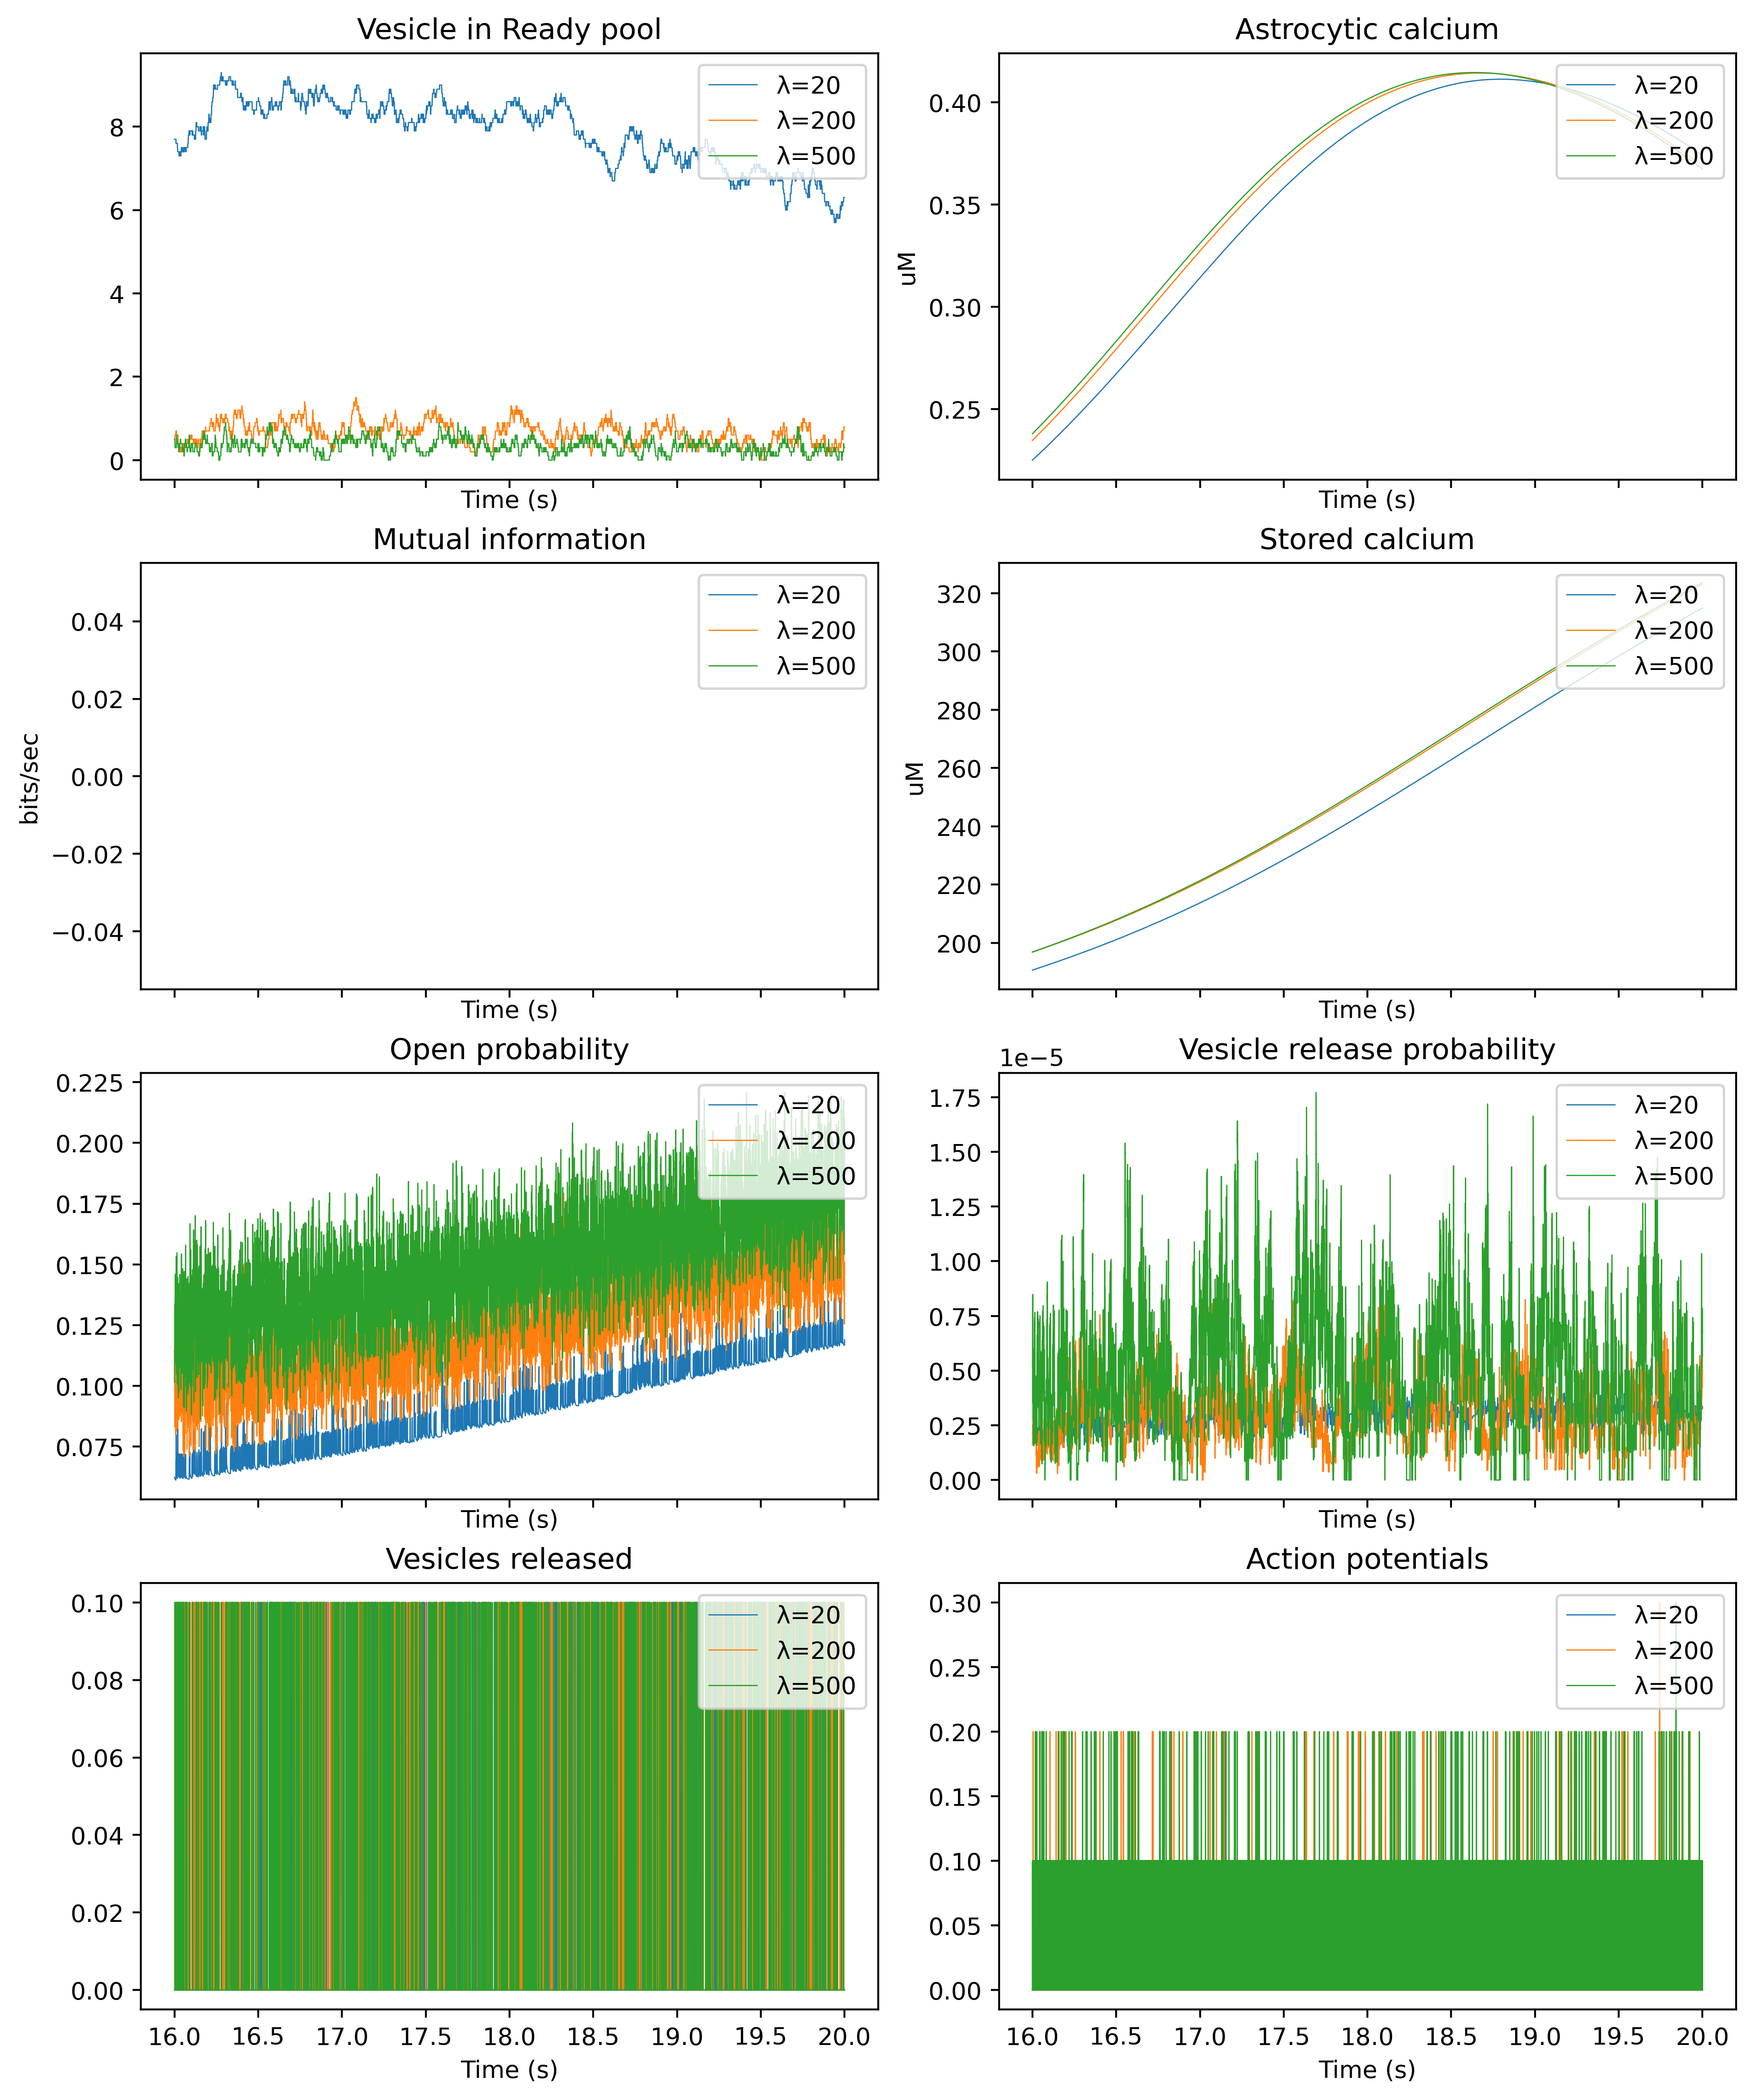

Average number of APs: 76.9 (2.6 Hz)
λ=20
Average number of APs: 576.0 (19.2 Hz)
λ=200
Average number of APs: 985.6 (32.9 Hz)
λ=500
Average number of vesicle releases: 56.2 (1.9 Hz)
λ=20
Average number of vesicle releases: 60.5 (2.0 Hz)
λ=200
Average number of vesicle releases: 63.9 (2.1 Hz)
λ=500
Average mutual information: nan bit/s
λ=20
Average mutual information: nan bit/s
λ=200
Average mutual information: nan bit/s
λ=500
membrane_tau = 0.02 s
spike_duration = 0.002 s
C = (1e-06,) uF
R = 20000.0 ohm
t_ref_s = 0.002 s
t_ref_v = 0.0063 s
LTP_active = True 
STD_active = True 
Urest = -0.0625 V
threshold = -0.0343 V
Threshold_rest = -0.0489 V
hyperp_v = -0.0747 V
hyperp_tau = 0.08 s
N_v_max = 10 
vesicles_replenishment_time = 0.06 s
glutamate_clearance_time = 0.002 s

time_step = 2e-05 s
DiffEq = False 
simulation_time = 30 s
temperature = 310 K
N = 1500000 
lambda_fixed = True 
lambda_ = 500 Hz
N_iterations = 10 



In [12]:
# Select a saved plot to show
importlib.reload(myPlot)
importlib.reload(neuron)
time_window = 16,20
labels = ["λ=20", "λ=200", "λ=500"]
file_name = "risultati/"
file_name += "22_02_f(λ)_"
f1 = open(file_name+"params", "rb")
parameters: neuron.SimulationParameters = pickle.load(f1)
f2 = open(file_name+"properties", "rb")
properties: neuron.Properties = pickle.load(f2)
f3 = open(file_name+"my", "rb")
values = pickle.load(f3)
print("Numero di iterazioni: %d"%parameters.N_iterations)
axes = myPlot.drawFigure(parameters.simulation_time, parameters.time_step, values, time_window=time_window, labels=labels, n_drawings=len(values.track_variables), n_plots=3, dpixel=400)
print(str(properties) + "\n" + str(parameters))
